In [2]:
from numpy import *
from pylab import *
from cosmopit import pk_Class,mypymcLib,numMath,fitting
run_mcmc=False # if False do not run MCMC, if True run also MCMC

## load North Galactic Cap two point correlation function data
test_xi = load('DATA/xi_n.npz')

loader= test_xi['data'].item()
r = loader['rcom'] 
rhAllObs = loader['rhAllObs']
xi_data = loader['xi_data']
covmatObs = loader['covmatObs']

### Simplify data input for fitting softwares, only the 0.538 <= z <= 0.592 selected
xx_data = r                        ## radial comoving scale of the spheres in Mpc/h
yy_data = xi_data[2]               ## two point correlation function data 
ye_data = sqrt(diag(covmatObs[2])) ## error in the midle redshift bin 

### cut the data around the peak position
#wok = where( (xx_data>20.) & (xx_data<180.)  )
wok = where( (xx_data>20.) & (xx_data<180.)  )

# cut data with full covariance matric
#xx,yy,ye = numMath.cut_data(xx_data,yy_data,covmat,wok)

## cut data with only diagonal covariance matrix 
xx = xx_data[wok]
yy = yy_data[wok]
ye = ye_data[wok]

## P(k) convertion to xi(r) through pk_Class with the fiducial LCDM cosmology
paramsFid  =  pk_Class.cosmo_PlanckAll()
pkTheoryFid =  pk_Class.theory(paramsFid,0.565)
r_dth       = pkTheoryFid.get_rs()*0.6727

#### fitter inputs:

# construct the model
def model_iso(x,pars):
	res_xi = pars[0]**2.*pkTheoryFid.xi(x/pars[1])
	res_xi[isnan(res_xi)] = -1e30
	return res_xi

#1# inputs of the fitter using MCMC: mypymcLib.py 
guess = [2.0,1.0]
res   = fitting.dothefit(xx,yy,ye,guess,functname=model_iso) 

#2# inputs of the fitter using MCMC: mypymcLib.py 
if run_mcmc:
	nburn=0e3
	niter=20000
	variables = ['bias','a']
	data = mypymcLib.Data(xvals=xx,yvals=yy,errors=ye,model=model_iso)
	chains   = mypymcLib.run_mcmc([data]     , variables=variables,niter=niter,nburn=nburn,w_ll_model='bias_aiso')
	savez('chain_out.npz',
		chains=chains,vars=variables, # important lines because they are needed from the mypymcLib.matrixplot module
		niter=niter,nburn=nburn)

#### Plot the output of the chains 
def totoPlot(toto,color2='blue',labels=['$b$','$\\alpha$'],Blabel=None,KMIN=5000,NsigLim=5,plotCorrCoef=True):   
	# load variables
    vars = toto['vars']                                                                                                                                                                     
	# load chains
    chains = toto['chains'].item()                                                                                                                                                          
	# take only the last KMIN part of the chain that is hopefully converge. 
	# This is not a convergence test                                                                                                                                                                                                                                                                          
    nchains = numMath.burnChains(chains,kmin=KMIN)

    smth=10.0 # smoothing factor for making pretty plots
                                                                                                                                                                                                                                     
    mypymcLib.matrixplot(nchains, vars, color2, smth, 
    		labels= labels,
    		Blabel=Blabel,NsigLim=NsigLim,
    		Bpercentile=False,
    		plotCorrCoef=plotCorrCoef)


Fitting with Minuit
Fitting with Minuit


FCN = 12.0706562633 
 TOTAL NCALL = 66 
 NCALLS = 66 
 
 
 EDM = 1.72460127e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,c0,2.23841,0.106225,,,,,No
1,c1,0.990703,0.0373593,,,,,No


('Chi2=', 12.070656263260748)
('ndf=', 13)


cosmopit/mypymcLib.py:137: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  bla=np.histogram(chain[var],bins=nbins,normed=True)
cosmopit/mypymcLib.py:137: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  bla=np.histogram(chain[var],bins=nbins,normed=True)


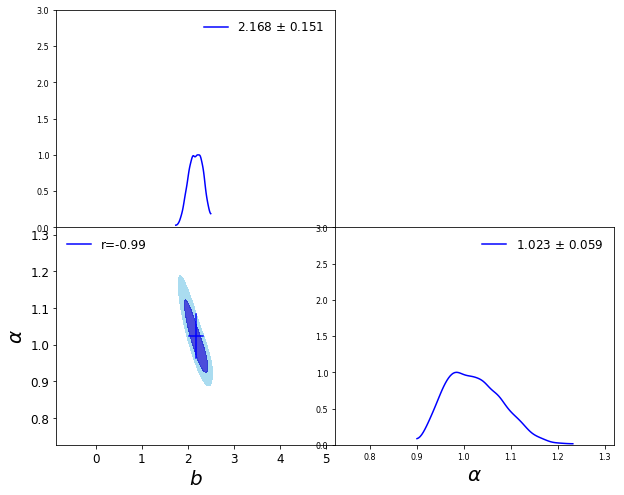

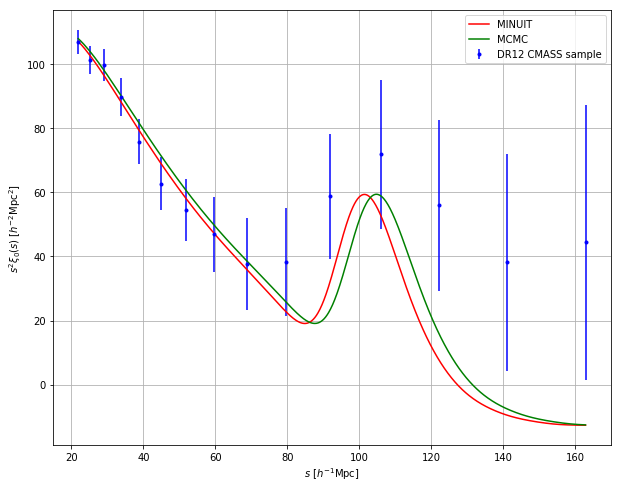

Fitting with Minuit
Fitting with Minuit


FCN = 2.32151575582 
 TOTAL NCALL = 388 
 NCALLS = 388 
 
 
 EDM = 6.6211049847e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,c0,1.03756,0.0727536,,,,,No
1,c1,0.00533117,0.00206638,,,,,No
2,c2,-16.7433,8.38721,,,,,No
3,c3,0.0116296,0.00294833,,,,,No
4,c4,-2.60522,0.374823,,,,,No
5,c5,160.469,9.0339,,,,,No


('Chi2=', 2.3215157558206885)
('ndf=', 9)
Fitting with Minuit
Fitting with Minuit


FCN = 9.08057517615 
 TOTAL NCALL = 81 
 NCALLS = 81 
 
 
 EDM = 8.3461484755e-20 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,c0,1,0,,,,,No
1,c1,0.005,0,,,,,No
2,c2,10,0,,,,,No
3,c3,0.0127666,0,,,,,No
4,c4,-2.49715,0,,,,,No
5,c5,156.395,0,,,,,No


No accurate covmat was built for params
 put cov=matrix(0)
('Chi2=', 9.080575176150521)
('ndf=', 9)


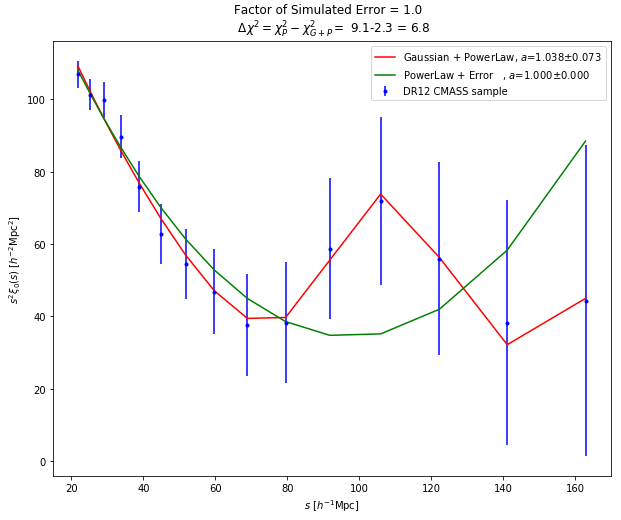

In [4]:

chains_out = load('chain_out.npz')
figure(1,figsize=(10,8)),clf(),totoPlot(chains_out),draw()
show()

### plot final resuls:
#1# iminuit results
figure(2,figsize=(10,8)),clf()
errorbar(xx,yy*xx**2,ye*xx**2,fmt='b.',label='DR12 CMASS sample')
# Fit a pretty model
x_model = linspace(xx.min(),xx.max(),1000)
plot(x_model,model_iso(x_model,res[1])*x_model**2,'r-',label='MINUIT')
draw()

#2# MCMC results
plot_chains = numMath.chainsTo2Darray(chains_out)
means,stds,covMat,corMat=numMath.average_realisations(plot_chains.T)
# Caveats:
# Becarefull! There is a bag here. When you load the chain this way you have to identify the order of the computed means
# Therefore I put the PermMatlist Option on function numMath.chainsTo2Darray. You need to identify first the order of output of the means and compare it iwth chain_in and see that they are consistent 
# Here:
bias_chain_out = means[1]
aiso_chain_out = means[0]
plot(x_model,model_iso(x_model,[bias_chain_out,aiso_chain_out])*x_model**2,'g-',label='MCMC')
draw()

grid()
legend()
ylabel('$s^2 \\xi_0(s) $ $[h^{-2}\mathrm{Mpc}^2]$')
xlabel('$s$ $[h^{-1} \mathrm{Mpc}]$')
show()

### Computation of the significance of the detection of the BAO peak Position ###
### delta chi2 = chi2_Gaussian_PowerLaw - chi2_PowerLaw_Error
### Fit the Gaussian + PowerLaw
### Fit the PowerLaw + Error
### Look Pierre Laurent Thesis, page 112, https://www.theses.fr/2016SACLS227.pdf
### Need to adjust the parameters to get a good measurement of the BAO Peak Position
### Take the significance level from Table 1 https://ned.ipac.caltech.edu/level5/Wall2/Wal3_4.html

def Gaussian(x,pars):
    return pars[1]*exp(-0.5*(x-pars[0]*r_dth)**2./pars[2]**2.)
def PowerLaw(x,pars):
    return pars[0] + pars[1]/x + pars[2]/x**2.
def Gaussian_PowerLaw(x,pars):
    return Gaussian(x, [pars[0],pars[1],pars[2]] ) + PowerLaw(x, [pars[3],pars[4],pars[5]] )

def PowerLaw_Error(x,pars):
    """ The power law is define as the Gaussian*0.0 + PowerLaw, so that we can fit the parameter 1 and compare the significance. """
    return 0.0*Gaussian(x, [pars[0],pars[1],pars[2]] ) + PowerLaw(x, [pars[3],pars[4],pars[5]] )

simulated_error_factor = 1.
guess = [1.0,0.005,10.,0.01,-2.,130.] # best guess, I found them by playing a bit on the Gaussian_PowerLaw, with simulated_error_factor = 1.
res_Gaussian_PowerLaw = fitting.dothefit(xx,yy,ye/simulated_error_factor,guess,functname=Gaussian_PowerLaw)#,parbounds=[(0.8,1.2),(.0,0.1),(0.0,0.3),(0.0,30.0),(-300.0,300.0),(0.0,100.0)])
res_PowerLaw_Error    = fitting.dothefit(xx,yy,ye/simulated_error_factor,guess,functname=PowerLaw_Error)#   ,parbounds=[(0.8,1.2),(-300.0,300.0),(-300.0,300.0),(-300.0,300.0),(-300.0,300.0),(-300.0,300.0)])

figure(3,figsize=(10,8))
clf(),
errorbar(xx,yy*xx**2,ye/simulated_error_factor*xx**2,fmt='b.',label='DR12 CMASS sample')
plot(xx, Gaussian_PowerLaw(xx,res_Gaussian_PowerLaw[1])*xx**2.,'r-',label='Gaussian + PowerLaw, $a$=%0.3f$\pm$%0.3f'%(res_Gaussian_PowerLaw[1][0],res_Gaussian_PowerLaw[2][0]) )

plot(xx, PowerLaw_Error(xx,res_PowerLaw_Error[1])*xx**2.,'g-'      ,label='PowerLaw + Error   , $a$=%0.3f$\pm$%0.3f'%(res_PowerLaw_Error[1][0],res_PowerLaw_Error[2][0]) )

title('Factor of Simulated Error = %0.1f  \n $\Delta\chi^2 = \chi^2_{P} - \chi^2_{G+P} = $ %0.1f-%0.1f = %0.1f'%(simulated_error_factor,res_PowerLaw_Error[4],res_Gaussian_PowerLaw[4],res_PowerLaw_Error[4]-res_Gaussian_PowerLaw[4]))
legend()
ylabel('$s^2 \\xi_0(s) $ $[h^{-2}\mathrm{Mpc}^2]$')
xlabel('$s$ $[h^{-1} \mathrm{Mpc}]$')
draw(),
show()